<img src="Drone2.png" width="400" height="400">

For the rest of the lesson you will be working with a drone that is able to move in two dimensions. 

This drone has two propellers each located a distance $l$ from the center of mass. In this exercise, we will ignore the yaw-inducing reactive moment from each propeller.

The state can be described by the vector: 

$$X = [z , y, \phi, \dot{z}, \dot{y},\dot{\phi}]$$

We will have to track the drone's position in 2 dimensions and its rotation about the $x$ axis, which is directed into the plane. 

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import jdc
from ExerciseAnswers import Answers

pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
class Drone2D:
    
    def __init__(self,
                 k_f = 0.1, # value of the thrust coefficient
                 i = 0.1,   # moment of inertia around the x-axis
                 m = 1.0,   # mass of the vehicle 
                 l = 0.15,  # distance between the center of 
                            #   mass and the propeller axis
                ):
        
        self.k_f = k_f
        self.i = i
        self.l = l 
        self.m = m
        
        self.omega_1 = 0.0
        self.omega_2 = 0.0
        self.g = 9.81
        
        # z, y, phi, z_dot, y_dot, phi_dot
        self.X = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
        
    def advance_state_uncontrolled(self, dt):
        """Advances the state of the drone by dt seconds. 
        Note that this method assumes zero rotational speed 
        for both propellers."""
        
        X_dot = np.array([self.X[3],
                          self.X[4],
                          self.X[5],
                          self.g,
                          0,
                          0])
        
        self.X += X_dot * dt
        
        return self.X

### Visual Code Check

If your code is working correctly then running the cell below should produce a graph that looks like this

![](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/March/5a9dbf94_yz-graph/yz-graph.png)

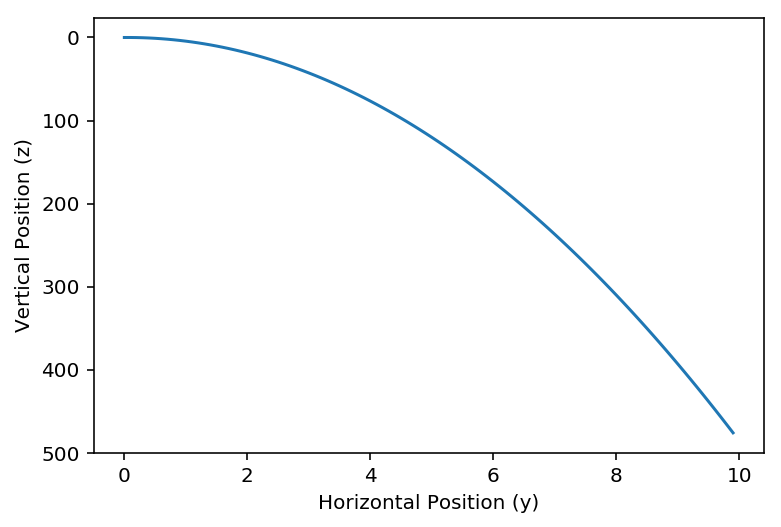

In [3]:
drone = Drone2D()
Z_history = []
Y_history = []
dt = 0.1

# add a slight initial horizontal velocity
drone.X[4] = 1.0

for _ in range(100):
    Z_history.append(drone.X[0])
    Y_history.append(drone.X[1])
    
    # call the uncontrolled (free fall) advance state function
    drone.advance_state_uncontrolled(dt)
    
plt.plot(Y_history, Z_history )

# invert the vertical axis so down is positive 
plt.gca().invert_yaxis()
plt.xlabel("Horizontal Position (y)")
plt.ylabel("Vertical Position (z)")
plt.show()

[Solution](/notebooks/3.%20Uncontrolled%202D%20Drone%20SOLUTION.ipynb)